In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_values = pd.read_csv('train_values2.csv')
train_labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv')

In [3]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print('Training feature shape: ',train_values.shape,'\nTraining label shape :',train_labels.shape)

Training feature shape:  (260601, 39) 
Training label shape : (260601, 2)


In [6]:
# Drop the id columns
train_values = train_values[train_values.columns[4:]]
test_values = test_values[test_values.columns[4:]]
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 35 columns):
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non-null object
plan_configuration                        260601 non-null object
has_superstructure_adobe_mud              260601 non-null int64
has_superstructure_mud_mortar_stone       260601 non-null int64
has_superstructure_stone_flag             260601 n

In [7]:
#Check for the missing values

# (train_values.isnull().sum()/train_values.shape[0])*100
train_labels = train_labels[['damage_grade']]
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 1 columns):
damage_grade    260601 non-null int64
dtypes: int64(1)
memory usage: 2.0 MB


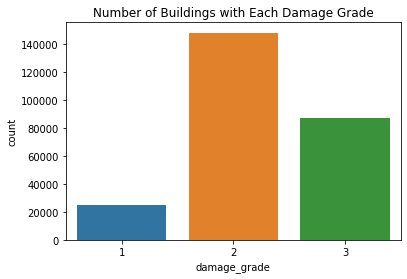

In [8]:
sns.countplot(train_labels['damage_grade'])
plt.title('Number of Buildings with Each Damage Grade');

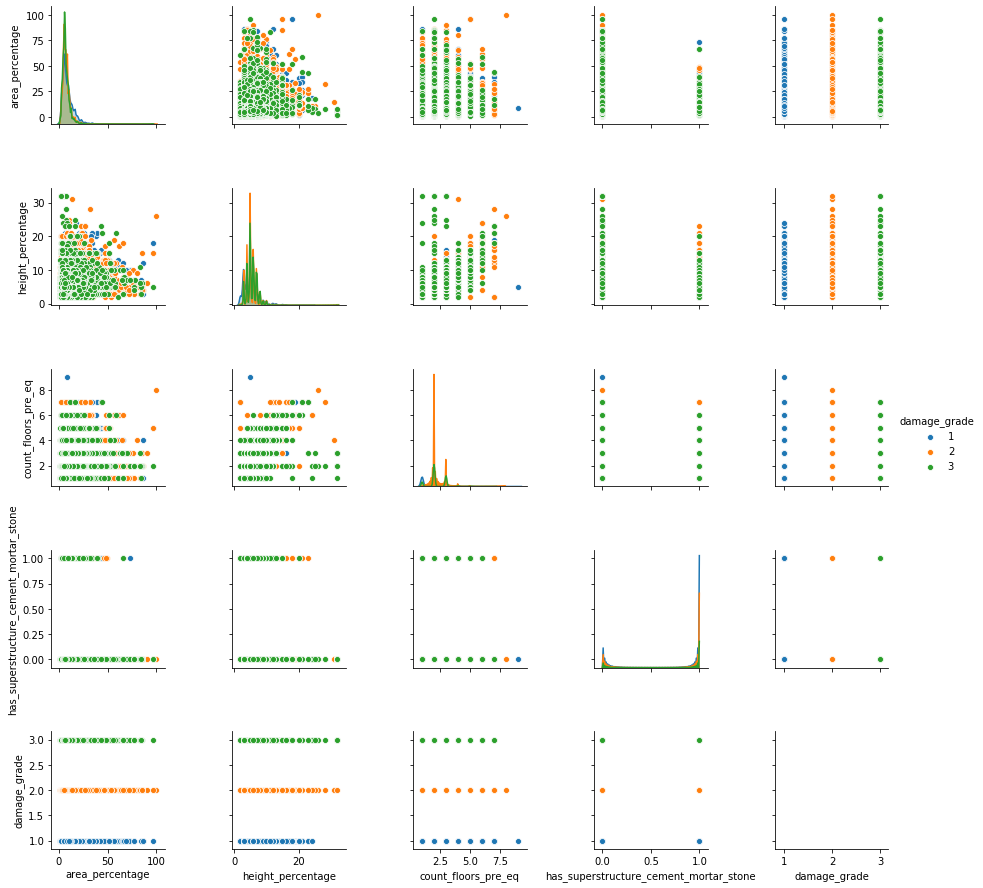

In [9]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = train_values[selected_features]

sns.pairplot(train_values_subset.join(train_labels), 
             hue='damage_grade')

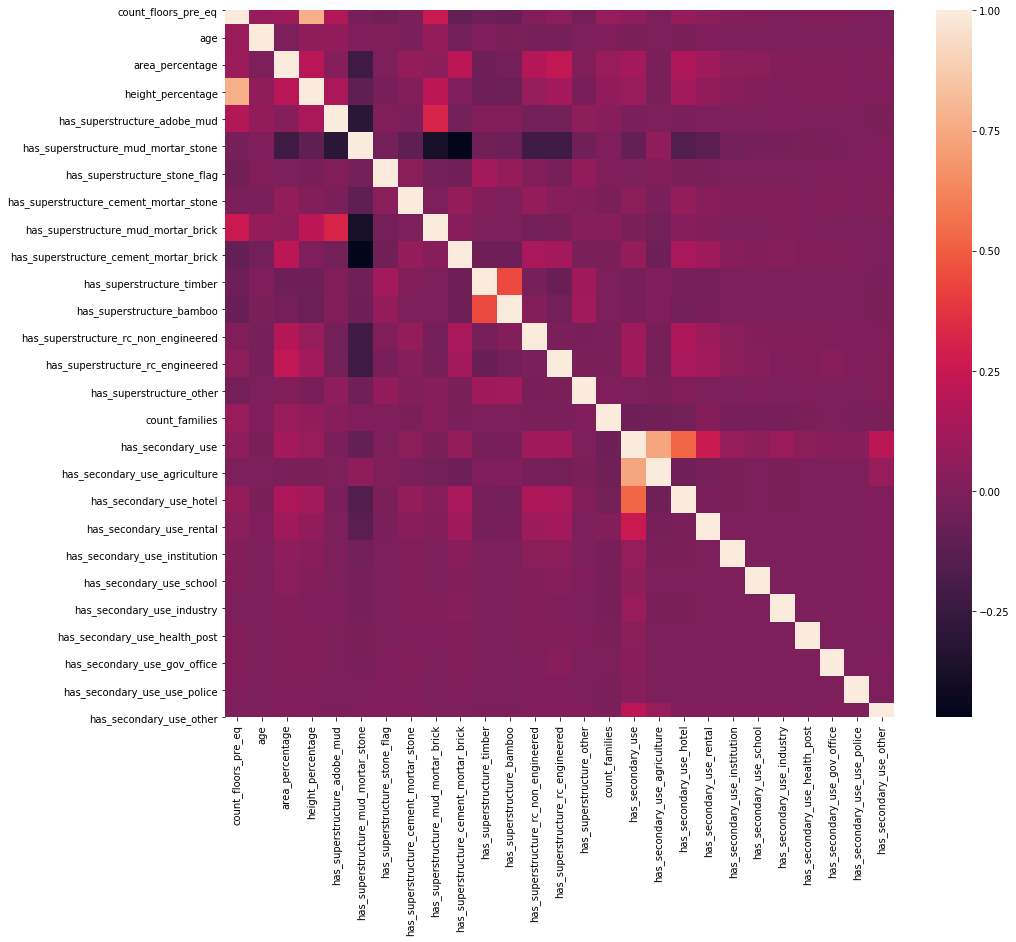

In [10]:
plt.figure(figsize=(15,13))
data_corr = train_values.corr()
sns.heatmap(data_corr)
plt.show();

In [11]:
train_values_new = pd.get_dummies(train_values)
test_values_new = pd.get_dummies(test_values)

print('Training dataset :',train_values_new.shape)
print('Test dataset :',test_values_new.shape)

Training dataset : (260601, 65)
Test dataset : (86868, 65)


In [12]:
from xgboost import plot_importance
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(train_values_new,train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

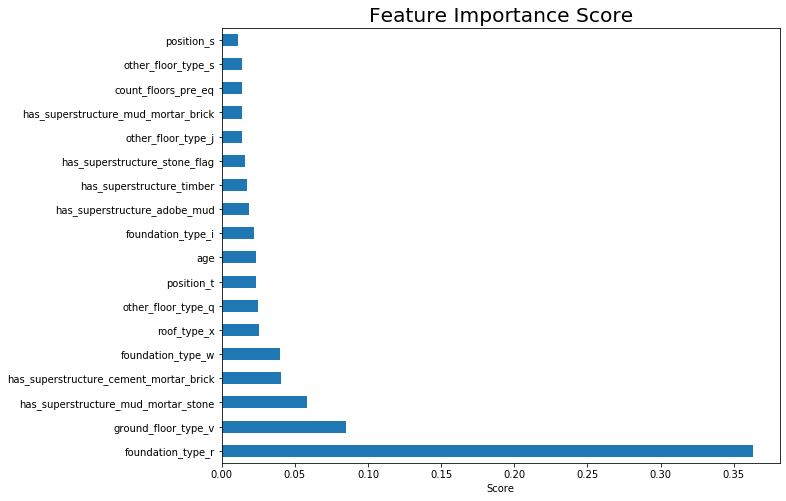

In [13]:
# Print the name and the gini importance of each features
# for features in zip(train_values_new.columns,model.feature_importances_):
#     print(features)

# Horizontal bar chart for feature Importance
feat_importances = pd.Series(model.feature_importances_,index= train_values_new.columns)
feat_importances = feat_importances.nlargest(18)
plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.style.use('fivethirtyeight')
plt.xlabel('Score')
plt.title('Feature Importance Score')
plt.show();

In [14]:
import_features = list(feat_importances.index)

train_values_df = train_values_new[import_features]
test_values_df = test_values_new[import_features]

print('Training dataset :',train_values_df.shape)
print()
print('Test dataset :',test_values_df.shape)

Training dataset : (260601, 18)

Test dataset : (86868, 18)


In [15]:
model = XGBClassifier()
model.fit(train_values_df,train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

XGBoost_y_pred = model.predict(train_values_df)

print(accuracy_score(train_labels,XGBoost_y_pred))

print(f1_score(train_labels, XGBoost_y_pred, average='micro'))

0.5868703496916743
0.5868703496916743


In [17]:
from sklearn.model_selection import StratifiedKFold

cv_model = XGBClassifier()

kfold = StratifiedKFold(n_splits=5,random_state=12)
result = cross_val_score(cv_model,train_values_df,train_labels,cv=kfold)
result

array([0.58651983, 0.58341168, 0.58619366, 0.5883538 , 0.5851913 ])

In [18]:
result.mean()*100

58.59340531750693